In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", font_scale=1.25)
from tqdm import tqdm
import sspals
from mc_sspals import initialize, annihilate, convert
from mc_sspals.tools import spectrum
from mc_sspals.laser import Laser, Transition, overlap, frac_excite, t_excite, photoionize
from mc_sspals.plots import bksub

In [3]:
# positrons
num = int(1e6)
sigma_x = 1e-3
sigma_t = 2e-9
# converter
eff = 0.25
T = 400
# Lyman-alpha
lyman_alpha = Transition(wavelength=243.0e-9, linewidth=1.0/(2*np.pi*3.2e-9))
threshold = 0.002
uv = Laser(energy=0.001, wavelength=2.43e-7, bandwidth=85e9, retro=False,
           distance=0.0005, height=0.006, width=0.0025, trigger=15e-9, sigma_t=3e-9)
# detector
kappa = 9e-9
dt = 1e-9
limits = [-1.0E-8, 3.5e-8, 7e-7]

In [4]:
di = initialize(num, sigma_t=sigma_t, sigma_x=sigma_x)
df = convert(di, eff=eff, T=T)
df.head()

,status,lifetime,ti,xi,yi,zi,vx,vy,vz
0,e+,0.0,-2.115892e-09,-0.000994,-0.000633,0.0,NaN,NaN,NaN
1,e+,0.0,-1.098206e-09,0.000097,0.000617,0.0,NaN,NaN,NaN
2,e+,0.0,-2.890151e-10,-0.000321,0.000521,0.0,NaN,NaN,NaN
3,e+,0.0,-1.750120e-09,-0.000713,-0.000461,0.0,NaN,NaN,NaN
4,e+,0.0,-5.901313e-10,-0.001250,0.000607,0.0,NaN,NaN,NaN


In [5]:
dp = photoionize(df, uv, lyman_alpha, threshold, prob=1.0)
dp.groupby('status').count()

,lifetime,ti,xi,yi,zi,vx,vy,vz
status,,,,,,,,
e+,749914,749914,749914,749914,749914,0,0,0
ion,66721,66721,66721,66721,66721,66721,66721,66721
o-Ps,183365,183365,183365,183365,183365,183365,183365,183365


In [6]:
bk = annihilate(df)
sig = annihilate(dp)

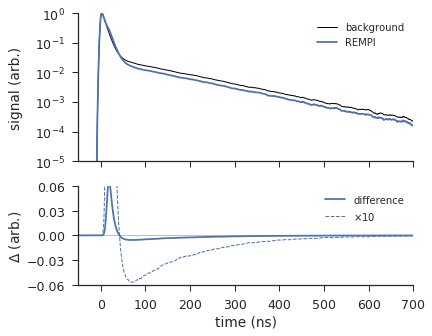

In [7]:
fig, ax = bksub()

# MC
xvals_bk, yvals_bk = spectrum(bk, amp=1.0, dt=dt, kappa=kappa)
ax[0].plot(xvals_bk* 1e9, yvals_bk, c='k', lw=1, label='background')

xvals, yvals = spectrum(sig, amp=1.0, dt=dt, kappa=kappa)
ax[0].plot(xvals* 1e9, yvals, label='REMPI')

ax[1].plot(xvals* 1e9, yvals - yvals_bk, label='difference')
ax[1].plot(xvals* 1e9, 10 * (yvals - yvals_bk), c='C0', ls='--', lw=1, label=r'$\times 10$')

ax[1].set_ylim([-0.06, 0.06])
ax[1].set_yticks([-0.06, -0.03, 0.0, 0.03, 0.06])

ax[0].legend(loc=0, fontsize=10)
ax[1].legend(loc=0, fontsize=10)

sns.despine(ax=ax[0], trim=False)
sns.despine(ax=ax[1], trim=False)

#output
plt.savefig("../images/mc_ion.pdf", bbox_inches='tight', dpi=200)
plt.show()

In [8]:
frac_excite(df, uv, lyman_alpha, threshold, prob=1.0)

0.27931110990174862

In [9]:
fd = sspals.sspals_1D(spectrum(sig, amp=1.0, dt=dt, kappa=kappa)[1], dt, limits=limits)['DF'][0]
fd

0.17497419847760548

In [10]:
fb = sspals.sspals_1D(spectrum(bk, amp=1.0, dt=dt, kappa=kappa)[1], dt, limits=limits)['DF'][0]
fb

0.22670705009871467

In [11]:
sspals.signal(fd, 0, fb, 0)[0]

22.819251363635686